LAB 14 Implementation of Naive Bayes Algorithm

In [9]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("./tennis.csv")
print("Missing Values:\n", df.isnull().sum(), end="\n\n")
df.info()

Missing Values:
 outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [11]:
# Convert Object to Numeric Data type
label_encoder = {col: LabelEncoder() for col in df.columns}
tennis_data = df.copy()

for col, encoder in label_encoder.items():
    tennis_data[col] = encoder.fit_transform(df[col])

display(tennis_data)
tennis_data.info()

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     int64
 4   play      14 non-null     int32
dtypes: int32(4), int64(1)
memory usage: 468.0 bytes


In [12]:
# Test Train Split 
x = tennis_data.drop(columns=["play"])
y = tennis_data["play"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Train the model
model = CategoricalNB()
model.fit(X_train, y_train)

CategoricalNB()

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"accuracy = {accuracy}")

accuracy = 0.6


              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



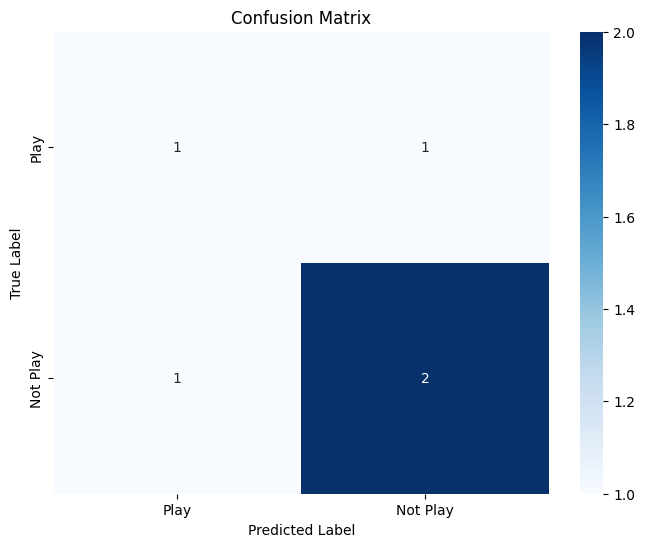

In [18]:
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',  xticklabels=['Play', 'Not Play'], yticklabels=['Play', 'Not Play'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
new_data = pd.DataFrame({
    "outlook": ["sunny"],
    "temp": ["mild"],
    "humidity": ["high"],
    "windy": [False]
})

# Encode new data using the trained LabelEncoders
for col, encoder in label_encoder.items():
    if col != "play":  # No need to encode the target variable
        new_data[col] = encoder.transform(new_data[col])

# Predict using the trained model
prediction = model.predict(new_data)
predicted_label = label_encoder["play"].inverse_transform(prediction)

print("Prediction:", predicted_label[0])

Prediction: no
